In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

#  Discrete Fourier Transform (DFT) vs Fast Fourier Transform (FFT) Performance

In [2]:
import time

In [3]:
def naive_dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [4]:
def measure_times(sizes):
    dft_times = []
    fft_times = []

    for N in sizes:
        x = np.random.random(N) + 1j * np.random.random(N)  # complex input

        # Time naive DFT
        start = time.time()
        naive_dft(x)
        dft_times.append(time.time() - start)

        # Time NumPy FFT
        start = time.time()
        np.fft.fft(x)
        fft_times.append(time.time() - start)

    return dft_times, fft_times

## a) Execution Time for Powers of Two

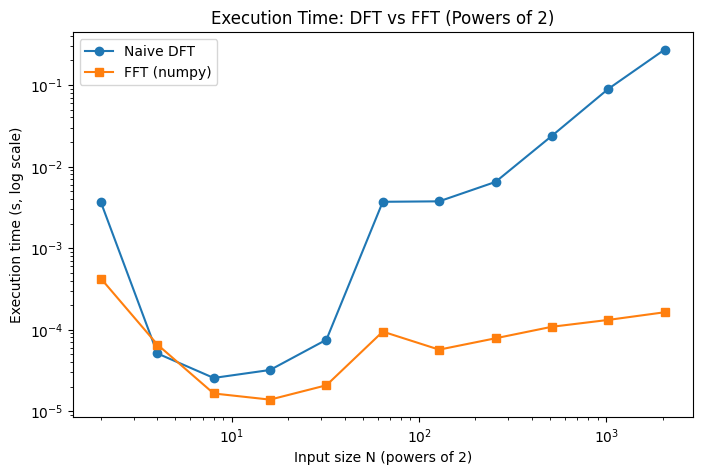

In [5]:
# Powers of 2
sizes_pow2 = [2**k for k in range(1, 12)]
dft_times_pow2, fft_times_pow2 = measure_times(sizes_pow2)

plt.figure(figsize=(8,5))
plt.plot(sizes_pow2, dft_times_pow2, 'o-', label="Naive DFT")
plt.plot(sizes_pow2, fft_times_pow2, 's-', label="FFT (numpy)")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Input size N (powers of 2)")
plt.ylabel("Execution time (s, log scale)")
plt.legend()
plt.title("Execution Time: DFT vs FFT (Powers of 2)")
plt.show()

### Q) Comment on how the execution time scales with N for both implementations.

For powers-of-two input sizes, the naive DFT has a computational complexity of
O(N^2), i.e its execution time grows quadratically with input size. This becomes very expensive as
N increases. In contrast, the FFT reduces the computation to O(NlogN), and thus its execution time grows much more slowly with N.

The plotted results confirm this: while the naive DFT curve rises steeply, the FFT curve increases very gently, especially for large N. This efficiency is why FFT dominates in practical applications.

## b) Execution Time for Non-Powers of Two

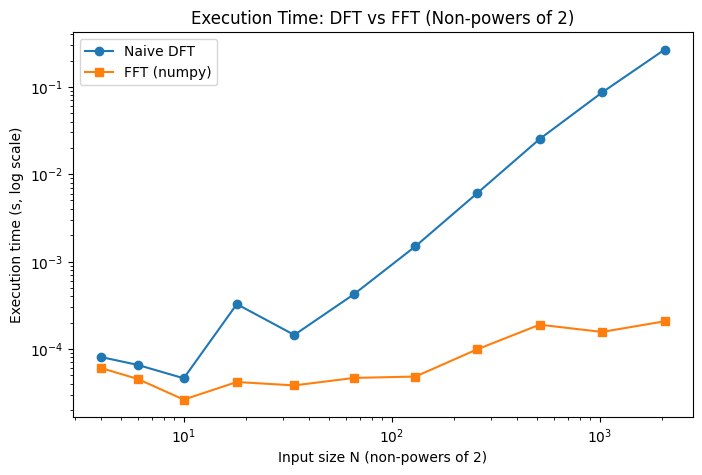

In [6]:
# Non-powers of 2
sizes_nonpow2 = [2**k + 2 for k in range(1, 12)]
dft_times_nonpow2, fft_times_nonpow2 = measure_times(sizes_nonpow2)

plt.figure(figsize=(8,5))
plt.plot(sizes_nonpow2, dft_times_nonpow2, 'o-', label="Naive DFT")
plt.plot(sizes_nonpow2, fft_times_nonpow2, 's-', label="FFT (numpy)")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Input size N (non-powers of 2)")
plt.ylabel("Execution time (s, log scale)")
plt.legend()
plt.title("Execution Time: DFT vs FFT (Non-powers of 2)")
plt.show()

###Q) Discuss how the FFT’s performance is affected for non-powers-of-two and compare it with the naive DFT.

For non-powers-of-two, the naive DFT is unaffected and still has a computational complexity of O(N^2). The FFT, however, loses some of its optimal performance. Many FFT algorithms are designed to exploit factorization when N is a power of two, and for arbitrary sizes, they may need additional computation or less efficient decomposition strategies.

As a result, FFT runtime for non-powers-of-two can be slightly slower than the power-of-two case, though it is still far faster than naive DFT for large
N. The two plots show this difference clearly: FFT remains efficient but with a small performance penalty for irregular sizes.

## Insight and Analysis

###Q) Explain why FFT is particularly efficient for powers-of-two inputs.

The FFT is particularly efficient for powers-of-two because the Cooley–Tukey algorithm used for FFT recursively breaks the DFT into smaller subproblems of size
N/2, which aligns perfectly with binary factorization. This recursive structure minimizes redundant computations and maximizes cache efficiency.

###Q)  Discuss real-world implications: when might using a naive DFT still be acceptable or preferable?

In real-world applications, naive DFT may still be acceptable or even preferable when
N is very small, since the overhead of setting up FFT recursion may not justify the optimization. Additionally, in educational settings, the naive DFT is valuable for illustrating the mathematics behind Fourier transforms. However, for any large-scale or performance-critical application such as image processing, audio analysis, or communications, FFT is the only practical choice.

### Extending the plot to show ratio of execution times (DFT / FFT) versus N to visualize the speed-up factor

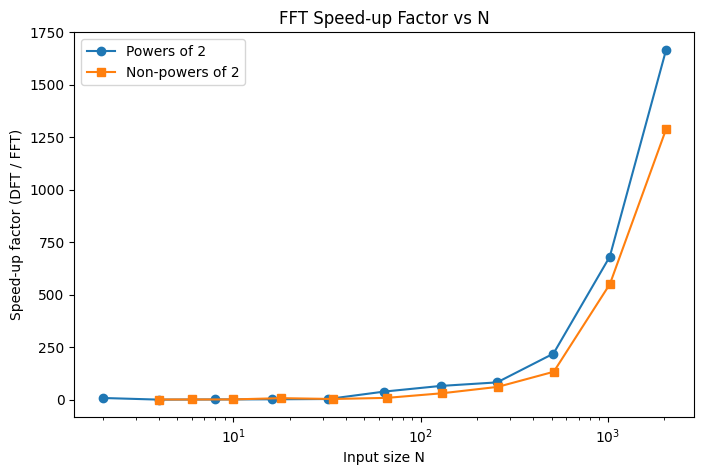

In [7]:
plt.figure(figsize=(8,5))
plt.plot(sizes_pow2, np.array(dft_times_pow2)/np.array(fft_times_pow2), 'o-', label="Powers of 2")
plt.plot(sizes_nonpow2, np.array(dft_times_nonpow2)/np.array(fft_times_nonpow2), 's-', label="Non-powers of 2")
plt.xscale("log")
plt.xlabel("Input size N")
plt.ylabel("Speed-up factor (DFT / FFT)")
plt.legend()
plt.title("FFT Speed-up Factor vs N")
plt.show()